<a href="https://colab.research.google.com/github/nikhil-xyz/MNIST_Dataset/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [72]:
data = tfds.load('fashion_mnist', split='train')

In [76]:
iter = data.as_numpy_iterator()

In [74]:
iter.next().keys()

dict_keys(['image', 'label'])

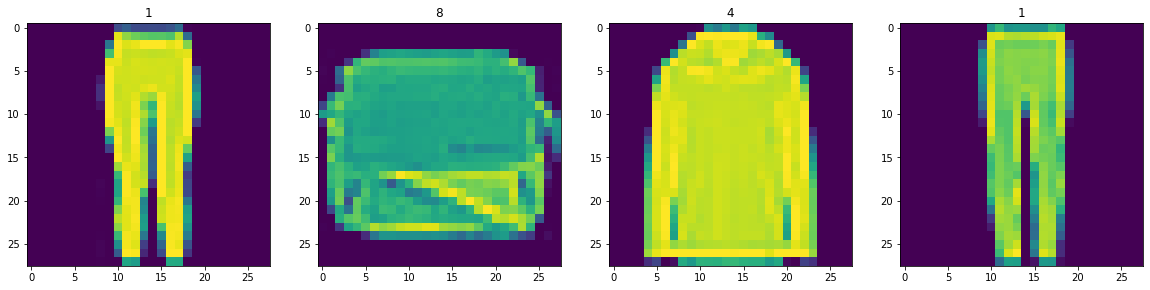

In [27]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4):
  batch = iter.next()
  ax[idx].imshow(np.squeeze(batch['image']))
  ax[idx].title.set_text(batch['label'])

In [77]:
X, y = [], []
for i in range(len(data)):
  batch = iter.next()
  X.append(batch['image'])
  y.append(batch['label'])

In [79]:
data = tf.data.Dataset.from_tensor_slices((X, y))
data = data.cache()
data = data.shuffle(60000)
data = data.batch(128)
data = data.prefetch(64)

In [122]:
train = data.take(int(len(data)*0.7))
val = data.skip(int(len(data)*0.7)).take(int(len(data)*0.2))
test = data.skip(int(len(data)*0.9)).take(int(len(data)*0.1))

In [123]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, LeakyReLU, Dense, Reshape, Dropout, MaxPooling2D

In [124]:
model = Sequential()
model.add(Conv2D(64, 3, padding='same', activation='relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D())

model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [125]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [126]:
history = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
328/328 [==============================] - 178s 542ms/step - loss: 0.8094 - accuracy: 0.7808 - val_loss: 0.3847 - val_accuracy: 0.8639
Epoch 2/5
328/328 [==============================] - 176s 535ms/step - loss: 0.3741 - accuracy: 0.8652 - val_loss: 0.3264 - val_accuracy: 0.8787
Epoch 3/5
328/328 [==============================] - 175s 534ms/step - loss: 0.3252 - accuracy: 0.8813 - val_loss: 0.2812 - val_accuracy: 0.8955
Epoch 4/5
328/328 [==============================] - 174s 530ms/step - loss: 0.2933 - accuracy: 0.8929 - val_loss: 0.2665 - val_accuracy: 0.9027
Epoch 5/5
328/328 [==============================] - 175s 533ms/step - loss: 0.2695 - accuracy: 0.9020 - val_loss: 0.2381 - val_accuracy: 0.9114


In [127]:
model.predict(test)

46/46 [==============================] - 6s 118ms/step


array([[9.9348634e-01, 1.4049433e-01, 5.3846335e-01, ..., 6.4342812e-02,
        8.1297822e-02, 6.1606863e-03],
       [7.6830024e-01, 1.5490520e-01, 8.6723244e-01, ..., 1.0936652e-02,
        5.8092362e-01, 1.2825441e-01],
       [5.6649822e-01, 1.0015842e-05, 1.4972909e-02, ..., 9.9995208e-01,
        1.0108612e-02, 9.9657339e-01],
       ...,
       [7.9618973e-01, 9.4789927e-09, 5.1583117e-03, ..., 6.7671299e-01,
        4.1264734e-01, 8.0322903e-01],
       [7.5076485e-01, 4.4855729e-02, 9.9443102e-01, ..., 6.3739331e-03,
        3.3312149e-02, 1.2206862e-01],
       [9.9349225e-01, 2.5002826e-03, 3.8172933e-01, ..., 5.1981203e-02,
        1.0395910e-01, 2.3941947e-02]], dtype=float32)

In [130]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [131]:
for batch in test.as_numpy_iterator():
  X_true, y_true = batch
  yhat = model.predict(X_true)
  yhat = [np.argmax(y) for y in yhat]
  yhat = np.array(yhat)
  y_true = y_true.flatten()
  yhat = yhat.flatten()
  acc.update_state(y_true, yhat)
print(acc.result().numpy())

4/4 [==============================] - 0s 32ms/step
0.95652175


In [132]:
print(acc.result().numpy())

0.95652175
